<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/IA353/EFp3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4334 - accuracy: 0.8680
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1432 - accuracy: 0.9561
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1106 - accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0938 - accuracy: 0.9701
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0818 - accuracy: 0.9742


## Test Accuracy

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9796


[0.06658422201871872, 0.9796000123023987]

## Working with multiple executions to stabilize results

In [6]:
executions = 5
histories = []
evaluations = []

for i in range(executions):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  print('## Training model number: ', i+1)

  model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
  
  histories.append(model.fit(x_train, y_train, epochs=5, verbose=0))

  print('#• Test set:')
  evaluations.append(model.evaluate(x_test, y_test))
  print('\n')

## Training model number:  1
#• Test set:
313/313 [==============================] - 1s 1ms/step - loss: 0.0714 - accuracy: 0.9793


## Training model number:  2
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9798


## Training model number:  3
#• Test set:
313/313 [==============================] - 1s 1ms/step - loss: 0.0728 - accuracy: 0.9779


## Training model number:  4
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9809


## Training model number:  5
#• Test set:
313/313 [==============================] - 1s 1ms/step - loss: 0.0725 - accuracy: 0.9778




In [7]:
histories[0].history.keys()

dict_keys(['loss', 'accuracy'])

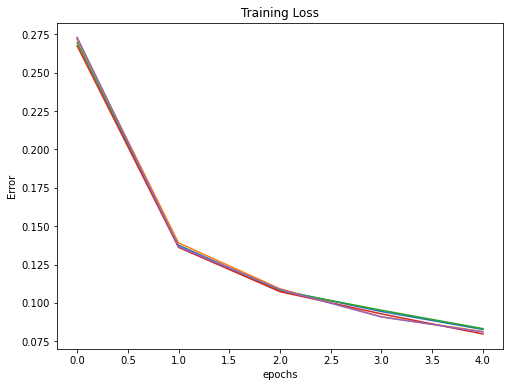

In [8]:
plt.figure(figsize=(8, 6))  
plt.xlabel('epochs')
plt.ylabel('Error')
plt.title('Training Loss')
for i in range(executions):
  plt.plot(histories[i].history['loss'])
plt.show()

In [9]:
histories[-1].history['accuracy'] # Last training acc log per epochs

[0.918483316898346,
 0.9578999876976013,
 0.9666333198547363,
 0.9712333083152771,
 0.9740166664123535]

In [10]:
evaluations[0] # Loss and acc for the first model (LIST)

[0.07141365855932236, 0.9793000221252441]

In [11]:
acc_val = []
acc_test = []

for i in range(executions):
  acc_val.append(sum(histories[i].history['accuracy']) / len(histories[i].history['accuracy']))
  acc_test.append(evaluations[i][1])

acc_val

[0.9572099924087525,
 0.9574733257293702,
 0.9575533270835876,
 0.9583866715431213,
 0.9576533198356628]

In [12]:
acc_test

[0.9793000221252441,
 0.9797999858856201,
 0.9779000282287598,
 0.98089998960495,
 0.9778000116348267]

### Average validation accuracy (training set)

In [13]:
avg_acc_val = sum(acc_val)/len(acc_val)
avg_acc_val

0.9576553273200987

### Average test accuracy

In [14]:
avg_acc_test = sum(acc_test)/len(acc_test)
avg_acc_test

0.9791400074958801

## Kfold Cross-Validation

In [15]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 10


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=5,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.06793808192014694; accuracy of 97.85000085830688%
Score for fold 2: loss of 0.07046012580394745; accuracy of 97.89000153541565%
Score for fold 3: loss of 0.07563810795545578; accuracy of 97.7400004863739%
Score for fold 4: loss of 0.07179751247167587; accuracy of 97.79000282287598%
Score for fold 5: loss of 0.07158935815095901; accuracy of 97.9200005531311%
Score for fold 6: loss of 0.06697253882884979; accuracy of 97.97999858856201%
Score for fold 7: loss of 0.06829292327165604; accuracy of 97.83999919891357%
Score for fold 8: loss of 0.06567429006099701; accuracy of 98.00000190734863%
Score for fold 9: loss of 0.07027006894350052; accuracy of 97.79000282287598%
Score for fold 10: loss of 0.0690060704946518; accuracy of 97.89999723434448%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.06793808192014694 - Accuracy: 97.850000858

# Modified Model

#### Add a layer

In [17]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [18]:
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = Adam(lr=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=8, batch_size=64, validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/8
750/750 - 2s - loss: 0.2966 - accuracy: 0.9096 - val_loss: 0.1320 - val_accuracy: 0.9595
Epoch 2/8
750/750 - 1s - loss: 0.1501 - accuracy: 0.9531 - val_loss: 0.1066 - val_accuracy: 0.9678
Epoch 3/8
750/750 - 1s - loss: 0.1184 - accuracy: 0.9629 - val_loss: 0.0905 - val_accuracy: 0.9733
Epoch 4/8
750/750 - 1s - loss: 0.1019 - accuracy: 0.9679 - val_loss: 0.0809 - val_accuracy: 0.9761
Epoch 5/8
750/750 - 1s - loss: 0.0927 - accuracy: 0.9710 - val_loss: 0.0800 - val_accuracy: 0.9766
Epoch 6/8
750/750 - 1s - loss: 0.0806 - accuracy: 0.9749 - val_loss: 0.0708 - val_accuracy: 0.9792
Epoch 7/8
750/750 - 1s - loss: 0.0744 - accuracy: 0.9767 - val_loss: 0.0703 - val_accuracy: 0.9798
Epoch 8/8
750/750 - 1s - loss: 0.0687 - accuracy: 0.9780 - val_loss: 0.0712 - val_accuracy: 0.9787


In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9805


[0.06425432860851288, 0.9804999828338623]

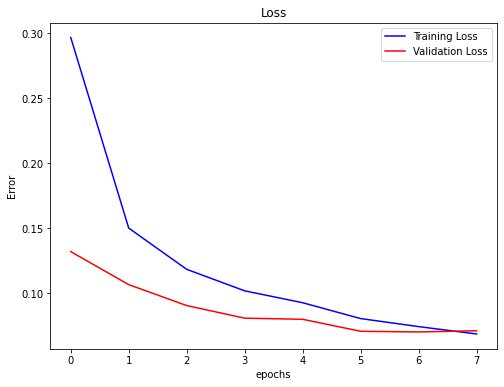

In [20]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

#### Only one layer

In [21]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1024, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = Adam(lr=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=8, batch_size=64, validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/8
750/750 - 1s - loss: 0.2810 - accuracy: 0.9156 - val_loss: 0.1362 - val_accuracy: 0.9605
Epoch 2/8
750/750 - 1s - loss: 0.1349 - accuracy: 0.9592 - val_loss: 0.1000 - val_accuracy: 0.9708
Epoch 3/8
750/750 - 1s - loss: 0.0986 - accuracy: 0.9696 - val_loss: 0.0881 - val_accuracy: 0.9743
Epoch 4/8
750/750 - 1s - loss: 0.0794 - accuracy: 0.9756 - val_loss: 0.0905 - val_accuracy: 0.9727
Epoch 5/8
750/750 - 1s - loss: 0.0677 - accuracy: 0.9777 - val_loss: 0.0810 - val_accuracy: 0.9771
Epoch 6/8
750/750 - 1s - loss: 0.0619 - accuracy: 0.9800 - val_loss: 0.0738 - val_accuracy: 0.9805
Epoch 7/8
750/750 - 1s - loss: 0.0534 - accuracy: 0.9825 - val_loss: 0.0771 - val_accuracy: 0.9785
Epoch 8/8
750/750 - 1s - loss: 0.0471 - accuracy: 0.9840 - val_loss: 0.0796 - val_accuracy: 0.9792


In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9814


[0.06541715562343597, 0.9814000129699707]

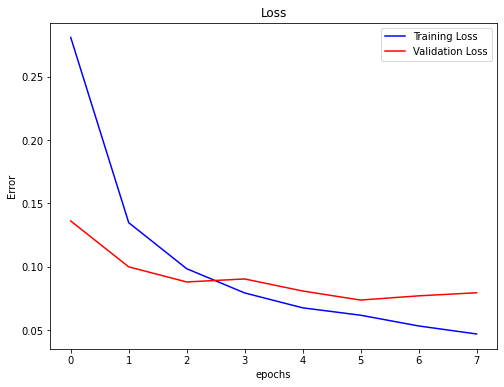

In [24]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

In [25]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 10


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  model.compile(optimizer = Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=8,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.06157814338803291; accuracy of 98.18999767303467%
Score for fold 2: loss of 0.06248781830072403; accuracy of 98.03000092506409%
Score for fold 3: loss of 0.061479613184928894; accuracy of 98.15999865531921%
Score for fold 4: loss of 0.06530001759529114; accuracy of 98.19999933242798%
Score for fold 5: loss of 0.06233282387256622; accuracy of 98.17000031471252%
Score for fold 6: loss of 0.05789928138256073; accuracy of 98.19999933242798%
Score for fold 7: loss of 0.060313548892736435; accuracy of 98.22999835014343%
Score for fold 8: loss of 0.0624200813472271; accuracy of 98.12999963760376%
Score for fold 9: loss of 0.06015358120203018; accuracy of 98.21000099182129%
Score for fold 10: loss of 0.06263736635446548; accuracy of 98.089998960495%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.06157814338803291 - Accuracy: 98.1899976

#### Two hidden layers

In [26]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
#  tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = Adam(lr=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data = (train_data_val, train_labels_val), verbose = 2)

model.evaluate(x_test, y_test)

Epoch 1/10
750/750 - 2s - loss: 0.2933 - accuracy: 0.9111 - val_loss: 0.1308 - val_accuracy: 0.9600
Epoch 2/10
750/750 - 1s - loss: 0.1501 - accuracy: 0.9529 - val_loss: 0.1147 - val_accuracy: 0.9665
Epoch 3/10
750/750 - 1s - loss: 0.1197 - accuracy: 0.9627 - val_loss: 0.0956 - val_accuracy: 0.9729
Epoch 4/10
750/750 - 1s - loss: 0.0996 - accuracy: 0.9693 - val_loss: 0.0880 - val_accuracy: 0.9730
Epoch 5/10
750/750 - 1s - loss: 0.0883 - accuracy: 0.9723 - val_loss: 0.0846 - val_accuracy: 0.9743
Epoch 6/10
750/750 - 1s - loss: 0.0796 - accuracy: 0.9744 - val_loss: 0.0834 - val_accuracy: 0.9759
Epoch 7/10
750/750 - 1s - loss: 0.0734 - accuracy: 0.9769 - val_loss: 0.0829 - val_accuracy: 0.9760
Epoch 8/10
750/750 - 1s - loss: 0.0659 - accuracy: 0.9789 - val_loss: 0.0873 - val_accuracy: 0.9740
Epoch 9/10
750/750 - 1s - loss: 0.0635 - accuracy: 0.9798 - val_loss: 0.0841 - val_accuracy: 0.9764
Epoch 10/10
750/750 - 1s - loss: 0.0589 - accuracy: 0.9813 - val_loss: 0.0825 - val_accuracy: 0.9783

[0.07313905656337738, 0.9801999926567078]

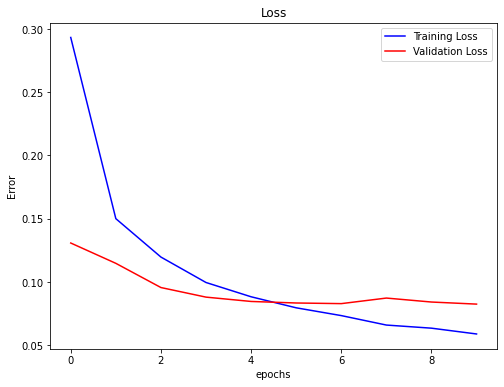

In [27]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

In [28]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 10


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=10,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.06641765683889389; accuracy of 98.05999994277954%
Score for fold 2: loss of 0.06440671533346176; accuracy of 98.07999730110168%
Score for fold 3: loss of 0.058618493378162384; accuracy of 98.30999970436096%
Score for fold 4: loss of 0.0624227412045002; accuracy of 98.32000136375427%
Score for fold 5: loss of 0.06228743866086006; accuracy of 98.11999797821045%
Score for fold 6: loss of 0.06717237085103989; accuracy of 98.0400025844574%
Score for fold 7: loss of 0.058532074093818665; accuracy of 98.24000000953674%
Score for fold 8: loss of 0.06199812516570091; accuracy of 98.2699990272522%
Score for fold 9: loss of 0.06738900393247604; accuracy of 97.97000288963318%
Score for fold 10: loss of 0.07011814415454865; accuracy of 97.87999987602234%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.06641765683889389 - Accuracy: 98.0599999